In [1]:
# 1번 문제

In [2]:
# 표본의 크기
n <- 14

In [5]:
X <- c(3, 1, 5, 8, 1, 4, 2, 6, 9, 3, 5, 7, 2, 6)
Y <- c(39, 24, 115, 105, 50, 86, 67, 90, 140, 112, 70, 186, 43, 126)
df <- data.frame(X, Y)
t(df)

X,3,1,5,8,1,4,2,6,9,3,5,7,2,6
Y,39,24,115,105,50,86,67,90,140,112,70,186,43,126


In [6]:
# (1) 이 데이터의 산점도를 그려라

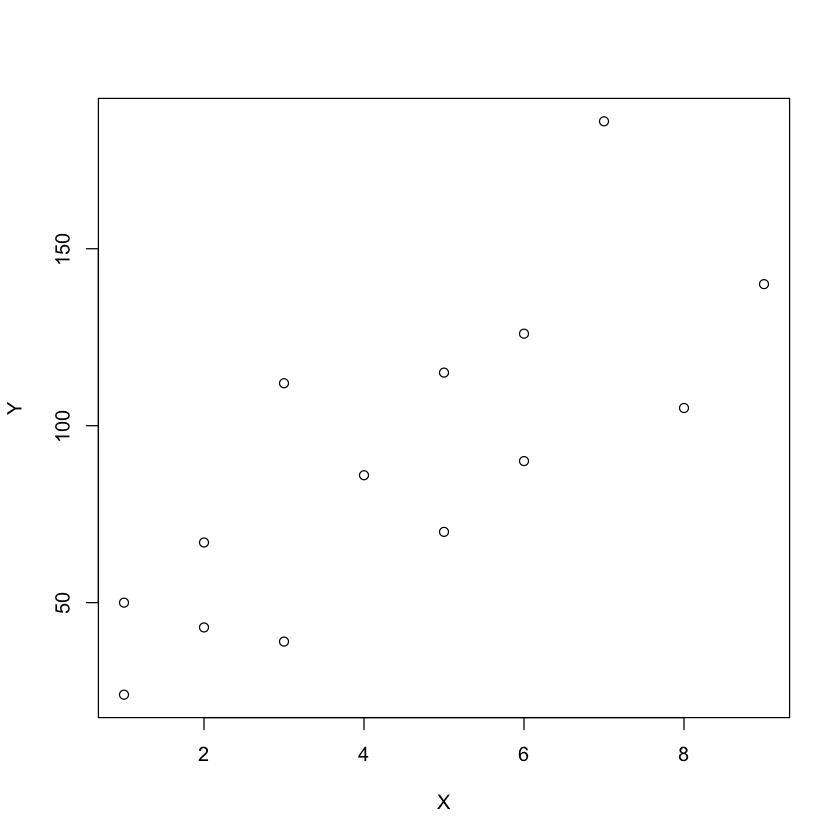

In [7]:
plot(df)

In [8]:
# 대충 봤을때는 회귀식이 얼추 나온다는걸 산점도를 통해 확인할 수 있습니다.

In [9]:
# (2) 최소제곱법에 의한 회귀직선을 적합시켜라.

[1] "##########"


Call:
lm(formula = Y ~ X, data = df)

Coefficients:
(Intercept)            X  
      29.11        13.64  


[1] "###########"


Call:
lm(formula = Y ~ X, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.204 -20.383  -4.748  13.957  61.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   29.107     15.969   1.823 0.093341 .  
X             13.637      3.149   4.330 0.000978 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.11 on 12 degrees of freedom
Multiple R-squared:  0.6098,	Adjusted R-squared:  0.5773 
F-statistic: 18.75 on 1 and 12 DF,  p-value: 0.0009779


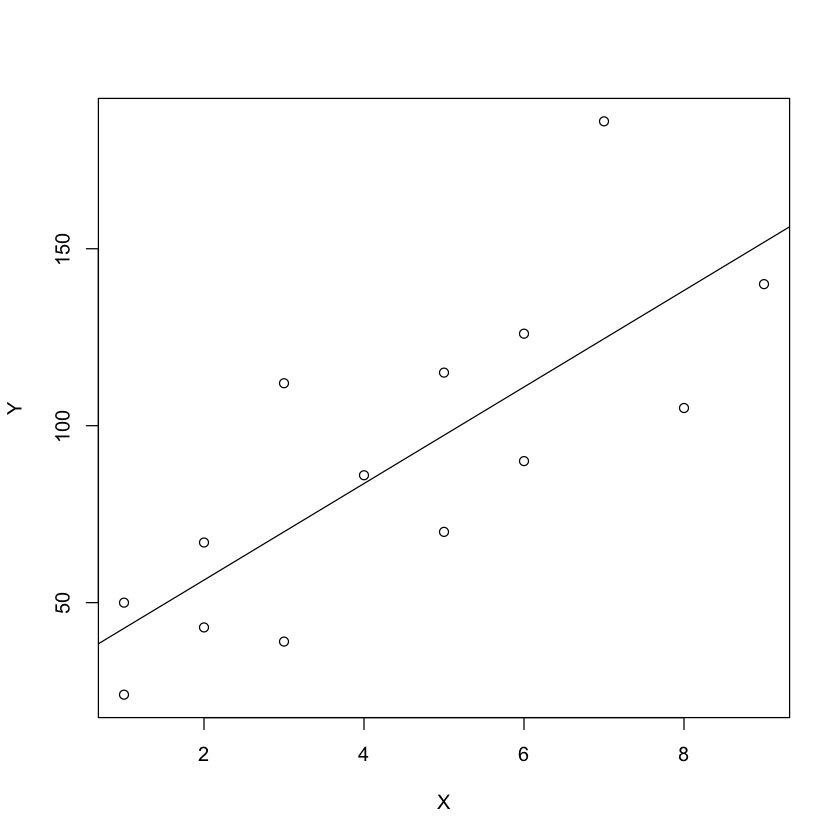

In [14]:
df.lm <- lm(Y ~ X, data=df)
df.lm.summary <- summary(df.lm)
plot(df)
abline(df.lm)
'##########'
df.lm
'###########'
df.lm.summary

In [15]:
# (3) 추정치의 표준오차를 구하여라
std.err <- df.lm.summary$sigma
std.err

[1] 29.10649

In [16]:
# 확인만 하고 싶다면 summary함수 호출후에 Residual standard error를 확인합니다.
# 변수로 쓰고싶다면 sigma값을 확인합니다.

In [17]:
# (4) 결정계수와 상관계수를 구하여라

In [19]:
# 결정계수는 summary의 값으로 확인이 가능합니다.
r.squared <- df.lm.summary$r.squared
r.squared
# 상관계수는 r.squared의 제곱근이며 양과 음은 기울기의 양과 음을 따릅니다.
signed <- ifelse(df.lm.summary$coefficients[2,1] > 0, 1, -1)
r <- sqrt(r.squared) * signed
r

[1] 0.6097933

[1] 0.7808926

In [23]:
# (5) 분산분석표를 작성하고 회귀 직선의 유의 여부를 검출하라(유의수준 0.05)
𝛼 <- 0.05
# 분산분석표 작성
df.lm.anova <- anova(df.lm)
df.lm.anova
# 분산분석표를 봤을 때 f value의 p value가 0.05 이하이므로 기울기는 0이 아니다 -> 유의하다
df.lm.anova$`Pr(>F)`[1] < 𝛼

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,15887.25,15887.2492,18.75293,0.0009779056
Residuals,12,10166.25,847.1876,NA,NA


[1] TRUE

In [24]:
# (6) 사용연도가 4년인 기계의 평균정비비용은 어느 정도인가를 추정하라

In [34]:
# predict 함수를 사용해서 구할 수 있다.
predict(df.lm, newdata=data.frame(X=4))
# 아니면 회귀계수들을 사용해서 직접 구할 수 있다.
β0 <- df.lm.summary$coefficients[1, 1]
β1 <- df.lm.summary$coefficients[2, 1]
year4 <- β0 + β1 * 4
year4

1 
83.65552

[1] 83.65552

In [35]:
# (7) 잔차를 구하여 잔차의 합이 영임을 확인하라.

In [41]:
Ŷ <- β0 + β1 * x
Ŷ

[1]  70.01839  42.74415  97.29264 138.20401  42.74415  83.65552  56.38127
 [8] 110.92977 151.84114  70.01839  97.29264 124.56689  56.38127 110.92977

In [42]:
e <- y - Ŷ
e

[1] -31.018395 -18.744147  17.707358 -33.204013   7.255853   2.344482
 [7]  10.618729 -20.929766 -11.841137  41.981605 -27.292642  61.433110
[13] -13.381271  15.070234

In [43]:
sum(e)

[1] -8.526513e-14

In [44]:
# (8) 잔차들의 x에 대한 가중합을 구하여라 => 0이 나와야함

In [48]:
t(x * e)
sum(x * e)

-93.05518,-18.74415,88.53679,-265.6321,7.255853,9.377926,21.23746,-125.5786,-106.5702,125.9448,-136.4632,430.0318,-26.76254,90.4214


[1] -2.842171e-13

In [46]:
# (9) 잔차들의 Ŷ에 대한 가중합을 구하여라 => 0이 나와야함

In [50]:
t(Ŷ * e)
sum(Ŷ * e)

-2171.858,-801.2026,1722.796,-4588.928,310.1452,196.1288,598.6974,-2321.734,-1797.972,2939.485,-2655.373,7652.531,-754.4531,1671.738


[1] -6.167511e-12

In [51]:
# (10) 두 변수 x, y를 표준화된 변수로 고친 후 회귀직선을 적합시키고, 그 회귀계수가 두 변수 x, y 간의 상관계수와 같음을 밝혀라

In [56]:
X.new <- (x - mean(x))/(sd(x)/sqrt(n))
X.new

[1] -2.0851441 -5.0043459  0.8340577  5.2128604 -5.0043459 -0.6255432
 [7] -3.5447450  2.2936586  6.6724612 -2.0851441  0.8340577  3.7532595
[13] -3.5447450  2.2936586

In [57]:
Y.new <- (y - mean(y))/(sd(y)/sqrt(n))
Y.new

[1] -4.22079282 -5.47449366  2.13129142  1.29549087 -3.30141221 -0.29253020
 [7] -1.88055126  0.04179003  4.22079282  1.88055126 -1.62981109  8.06547539
[13] -3.88647260  3.05067204

In [58]:
df.new <- data.frame(X.new, Y.new)
t(df.new)

X.new,-2.085144,-5.004346,0.8340577,5.212860,-5.004346,-0.6255432,-3.544745,2.29365855,6.672461,-2.085144,0.8340577,3.753259,-3.544745,2.293659
Y.new,-4.220793,-5.474494,2.1312914,1.295491,-3.301412,-0.2925302,-1.880551,0.04179003,4.220793,1.880551,-1.6298111,8.065475,-3.886473,3.050672


In [59]:
df.new.lm <- lm(Y.new ~ x.new, data=df.new)
df.new.lm


Call:
lm(formula = Y.new ~ x.new, data = df.new)

Coefficients:
(Intercept)        x.new  
  1.854e-16    7.809e-01  


In [60]:
df.new.lm.summary <- summary(df.new.lm)
df.new.lm.summary


Call:
lm(formula = Y.new ~ x.new, data = df.new)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7752 -1.7036 -0.3969  1.1666  5.1346 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.854e-16  6.502e-01    0.00 1.000000    
x.new       7.809e-01  1.803e-01    4.33 0.000978 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.433 on 12 degrees of freedom
Multiple R-squared:  0.6098,	Adjusted R-squared:  0.5773 
F-statistic: 18.75 on 1 and 12 DF,  p-value: 0.0009779


In [62]:
df.lm.summary$r.squared
df.new.lm.summary$r.squared

[1] 0.6097933

[1] 0.6097933

In [63]:
# 계수를 표준화 시키고 하나 표준화 시키지 않고 하나 결정계수(R²)는 동일하다.